<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/SVR_on_Position_salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/noushadkhan01/ML-and-DL-by-SuperDataScience.git

Cloning into 'ML-and-DL-by-SuperDataScience'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 252 (delta 78), reused 198 (delta 53), pack-reused 0
Receiving objects: 100% (252/252), 25.16 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [2]:
%cd ML-and-DL-by-SuperDataScience/Machine-Learning/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)


In [3]:
!ls

Position_Salaries.csv	regression_template.R		      svr.py
regression_template.py	SVR_on_Position_salary_dataset.ipynb  svr.R


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


# Train Model without Position for better visualisation

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [0]:
def my_visualisation(X, y, kernel, penalty, degree = 1, evaluate = 6.5, scaling = False):
  evaluate = np.array([[evaluate]])
  if scaling:
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    y = sc_y.fit_transform(y)
    evaluate = sc_X.transform(evaluate)
 
  model = SVR(C = penalty, kernel = kernel, degree = degree).fit(X, y)
  plt.figure(figsize = (10, 5))
  plt.scatter(X, y, color = 'green')
  plt.plot(X, model.predict(X), c = 'blue')
  plt.scatter(evaluate, model.predict(evaluate), c = 'red', marker = 'o')
  plt.title('SVR')
  plt.show()

In [11]:
X = df[['Level']]
X.head(2)

,Level
0,1
1,2


In [12]:
y = df[['Salary']]
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


##without scaling

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


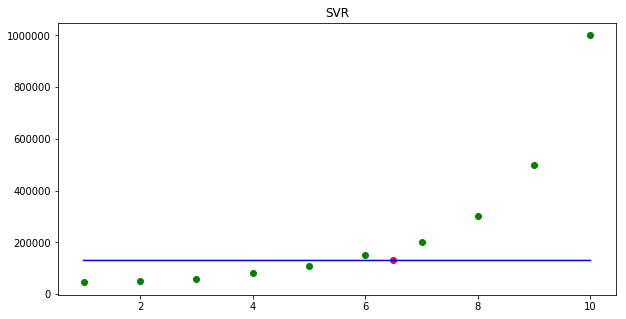

In [15]:
my_visualisation(X, y, kernel = 'rbf', penalty = 1.5, evaluate = 6.5)

##with scaling

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


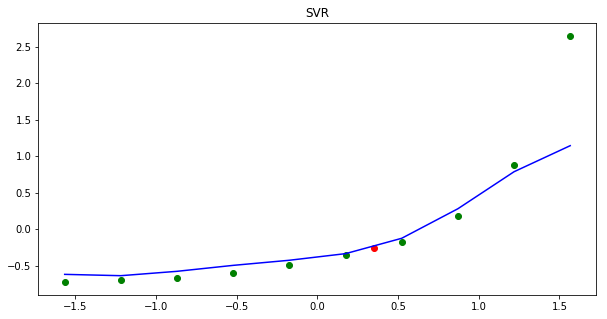

In [16]:
my_visualisation(X, y, kernel = 'rbf', penalty = 1.5, evaluate = 6.5, scaling = True)

### Linear Kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


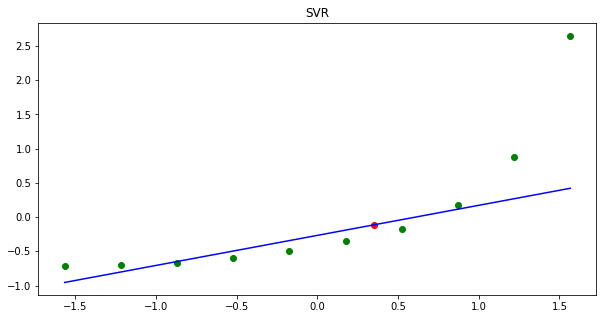

In [17]:
my_visualisation(X, y, kernel = 'linear', penalty = 1.5, evaluate = 6.5, scaling = True)

##Polynomial Kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


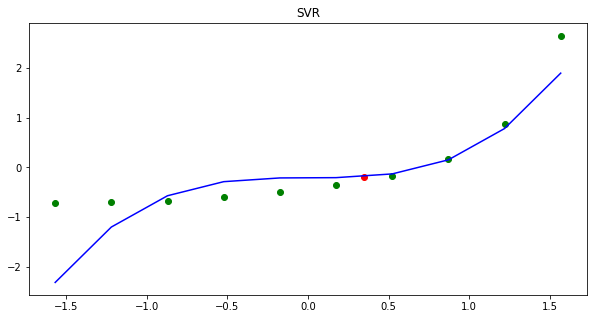

In [24]:
my_visualisation(X, y, kernel = 'poly', penalty = 1.5, degree = 3, evaluate = 6.5, scaling = True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


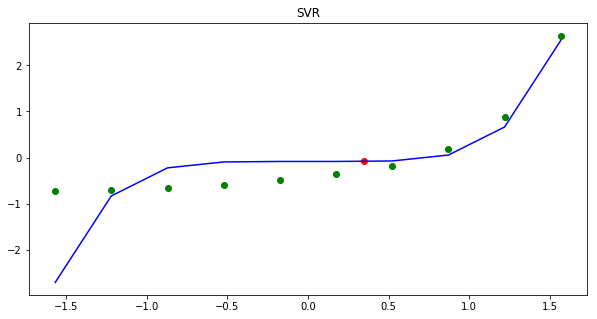

In [25]:
my_visualisation(X, y, kernel = 'poly', penalty = .5, degree = 5, evaluate = 6.5, scaling = True)